# Set environment

In [11]:
source("config_deseq.R")
source("util_deseq.R")

# Import data

In [2]:
# import RData (annomapres0, annogenecnts0)
attach(file.path(OUTDIR, "HTS-GroupB-Annotated-STAR-counts.RData"))

Prepare columnData DataFrame and countData (matrix object)
- columnData --- metadata
- countData  --- count matrix

In [5]:
# columnData --- metadata
columnData <- annomapres0 %>% DataFrame
rownames(columnData) <- columnData[["Label"]]

head(columnData[, c("Label", "Strain", "Media")], 3)

DataFrame with 3 rows and 3 columns
           Label      Strain       Media
     <character> <character> <character>
B_16        B_16         H99          TC
B_26        B_26         H99         YPD
B_27        B_27         H99         YPD

In [7]:
# countData  --- count matrix
annogenecnts0 %>%
    dplyr::select(as.character(c("gene", columnData[["Label"]]))) %>%
    as.data.frame %>%
    column_to_rownames("gene") %>%
    as.matrix ->
    countData

head(countData, 3)

,B_16,B_26,B_27,B_38,B_4,B_40
CNAG_04548,0,0,0,1,0,1
CNAG_07303,0,0,0,0,0,0
CNAG_07304,17,2,7,15,3,25


Explicitly checking to make sure the column names of count matrix are the same as the rownames of the metadata.

In [8]:
identical(rownames(columnData), colnames(countData))

[1] TRUE

# Make DESeq object on the basis of the counts


In [14]:
dds <- DESeqDataSetFromMatrix(
    countData,    # Count matrix
    columnData,   # metadata
    ~ Media)      # design formula
dds <- DESeq(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [15]:
res_media <- results(dds, contrast = c("Media", "YPD", "TC"), tidy = TRUE)

In [16]:
rlgexp <- DESeq2::rlog(dds, blind = TRUE)
vstexp <- DESeq2::vst(dds, blind=TRUE)
vomexp <- limma::voom(counts(dds))

In [24]:
gene_exp <- list()
gene_exp$cnt_unnorm <- counts(dds, normalize = FALSE)
gene_exp$cnt_norm   <- counts(dds, normalize = TRUE)
gene_exp$rlg        <- assay(rlgexp)
gene_exp$vst        <- assay(vstexp)
gene_exp$vom        <- vomexp$E

In [22]:
head(counts(dds, normalize = FALSE))

,B_16,B_26,B_27,B_38,B_4,B_40
CNAG_04548,0,0,0,1,0,1
CNAG_07303,0,0,0,0,0,0
CNAG_07304,17,2,7,15,3,25
CNAG_00001,0,0,0,0,0,0
CNAG_07305,1,0,0,1,0,2
CNAG_00002,92,11,98,173,27,214


In [23]:
head(counts(dds, normalize = TRUE))

,B_16,B_26,B_27,B_38,B_4,B_40
CNAG_04548,0.0000000,0.000000,0.000000,0.4728795,0.000000,0.4043448
CNAG_07303,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.0000000
CNAG_07304,11.6400540,9.257546,5.269246,7.0931921,6.215348,10.1086193
CNAG_00001,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.0000000
CNAG_07305,0.6847091,0.000000,0.000000,0.4728795,0.000000,0.8086895
CNAG_00002,62.9932335,50.916503,73.769451,81.8081489,55.938134,86.5297811


In [17]:
head(assay(rlgexp))

,B_16,B_26,B_27,B_38,B_4,B_40
CNAG_04548,-1.6289503,-1.5935662,-1.6271962,-1.6027501,-1.608450,-1.6066883
CNAG_07303,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
CNAG_07304,3.1974297,3.0605279,2.8606279,2.9650419,2.939717,3.1309772
CNAG_00001,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
CNAG_07305,-0.9381458,-0.9328742,-0.9886682,-0.9538661,-0.961156,-0.9276377
CNAG_00002,6.0329642,5.9112167,6.1540185,6.2366997,5.953809,6.2820662


In [18]:
head(assay(vstexp))

,B_16,B_26,B_27,B_38,B_4,B_40
CNAG_04548,2.744768,2.744768,2.744768,3.126846,2.744768,3.098224
CNAG_07303,2.744768,2.744768,2.744768,2.744768,2.744768,2.744768
CNAG_07304,4.529873,4.355311,3.985338,4.170189,4.085267,4.420647
CNAG_00001,2.744768,2.744768,2.744768,2.744768,2.744768,2.744768
CNAG_07305,3.203931,2.744768,2.744768,3.126846,2.744768,3.243396
CNAG_00002,6.244244,5.991316,6.437238,6.565895,6.102022,6.636390


In [20]:
head(vomexp$E)

,B_16,B_26,B_27,B_38,B_4,B_40
CNAG_04548,-4.034228,-3.8773324,-3.6216742,-2.153254,-2.0052814,-2.271949
CNAG_07303,-4.034228,-3.8773324,-3.6216742,-3.738216,-2.0052814,-3.856911
CNAG_07304,1.095055,-1.5554043,0.2852164,1.215980,0.8020735,1.815514
CNAG_00001,-4.034228,-3.8773324,-3.6216742,-3.738216,-2.0052814,-3.856911
CNAG_07305,-2.449266,-3.8773324,-3.6216742,-2.153254,-2.0052814,-1.534983
CNAG_00002,3.497153,0.6462296,4.0003776,4.700575,3.7760783,4.887923


# Dendrogram (Hierachical Clustering)

In [42]:
mydend <- lapply(gene_exp, function(mat){
    # construct the dendrogram
    mydend <- mat %>% t() %>% dist %>%
    hclust(method = "complete") %>%
    as.dendrogram
    
    return(mydend)
})  

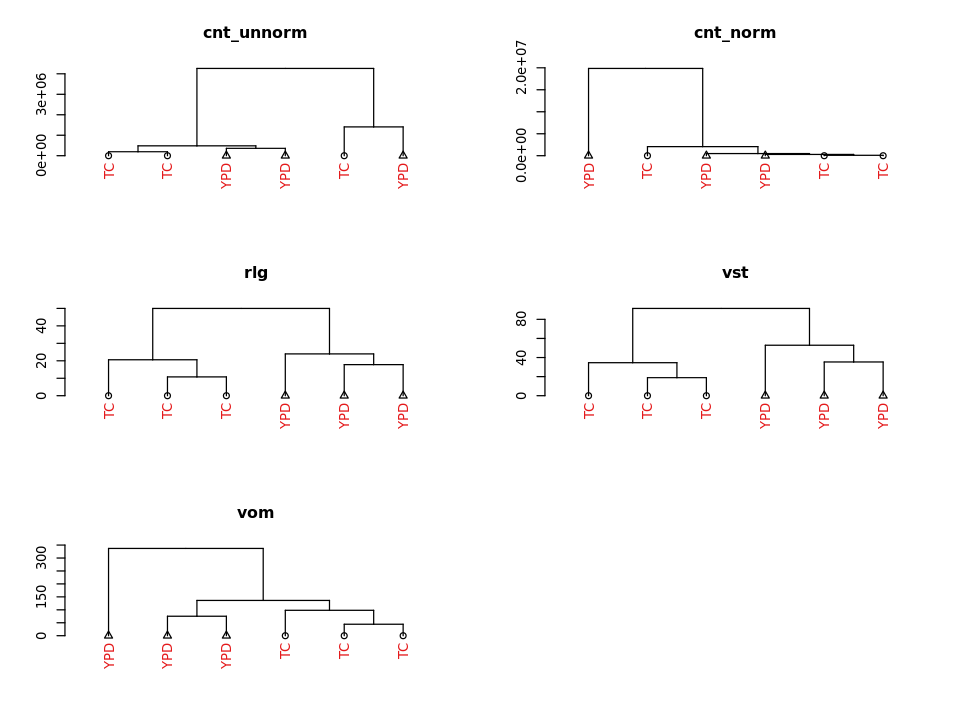

In [47]:
options(repr.plot.width = 8, repr.plot.height = 6)
par(mfrow = c(3, 2))
for (name in names(mydend)){
    dend <- mydend[[name]]
    plot(dendplot(dend, columnData, "Media", "Strain", "Media"),
        main = name)
    
}
par(mfrow = c(1, 1))

# Dimensional Reduction (PCA)

In [62]:
annomapres0

Label,Strain,Media,experiment_person,prop.gene,prop.nofeat,prop.unique,depth
B_16,H99,TC,expA,0.6828281,0.15846630,0.8412944,2999313
B_26,H99,YPD,expB,0.6050241,0.06762182,0.6726459,3036192
B_27,H99,YPD,expB,0.5561692,0.30984824,0.8660174,2766512
B_38,H99,TC,expB,0.5773448,0.35963998,0.9369848,2889270
B_4,H99,YPD,expA,0.1630784,0.31112660,0.4742050,3077208
B_40,H99,TC,expB,0.6519713,0.28794455,0.9399158,2777946


In [72]:
### plotting theme
### from http://huboqiang.cn/2016/03/03/RscatterPlotPCA
theme<-theme(panel.background = element_blank(),panel.border=element_rect(fill=NA),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),strip.background=element_blank(),axis.text.x=element_text(colour="black"),axis.text.y=element_text(colour="black"),axis.ticks=element_line(colour="black"),plot.margin=unit(c(1,1,1,1),"line"))

###
gps <- lapply(names(gene_exp), function(name){
    #
    mat <- gene_exp[[name]]
    
    #
    df_pca <- prcomp(t(mat))
    df_out <- as.data.frame(df_pca$x)
    df_out <- df_out %>% rownames_to_column("Label")

    #
    df_out <- annomapres0 %>% 
        as.data.frame %>%
        select(Label, Media) %>% 
        left_join(df_out, ., by = "Label")
    
    #
    percentage <- round(df_pca$sdev / sum(df_pca$sdev) * 100, 2)
    percentage <- paste(c("PC1", "PC2"), "(", paste(as.character(percentage), "%", " )", sep="") )

    #
    gp <- ggplot(df_out, aes(x = PC1, y = PC2, color = Media))
    gp <- gp + geom_point() + theme + xlab(percentage[1]) + ylab(percentage[2]) + ggtitle(name)
    return(gp)
})

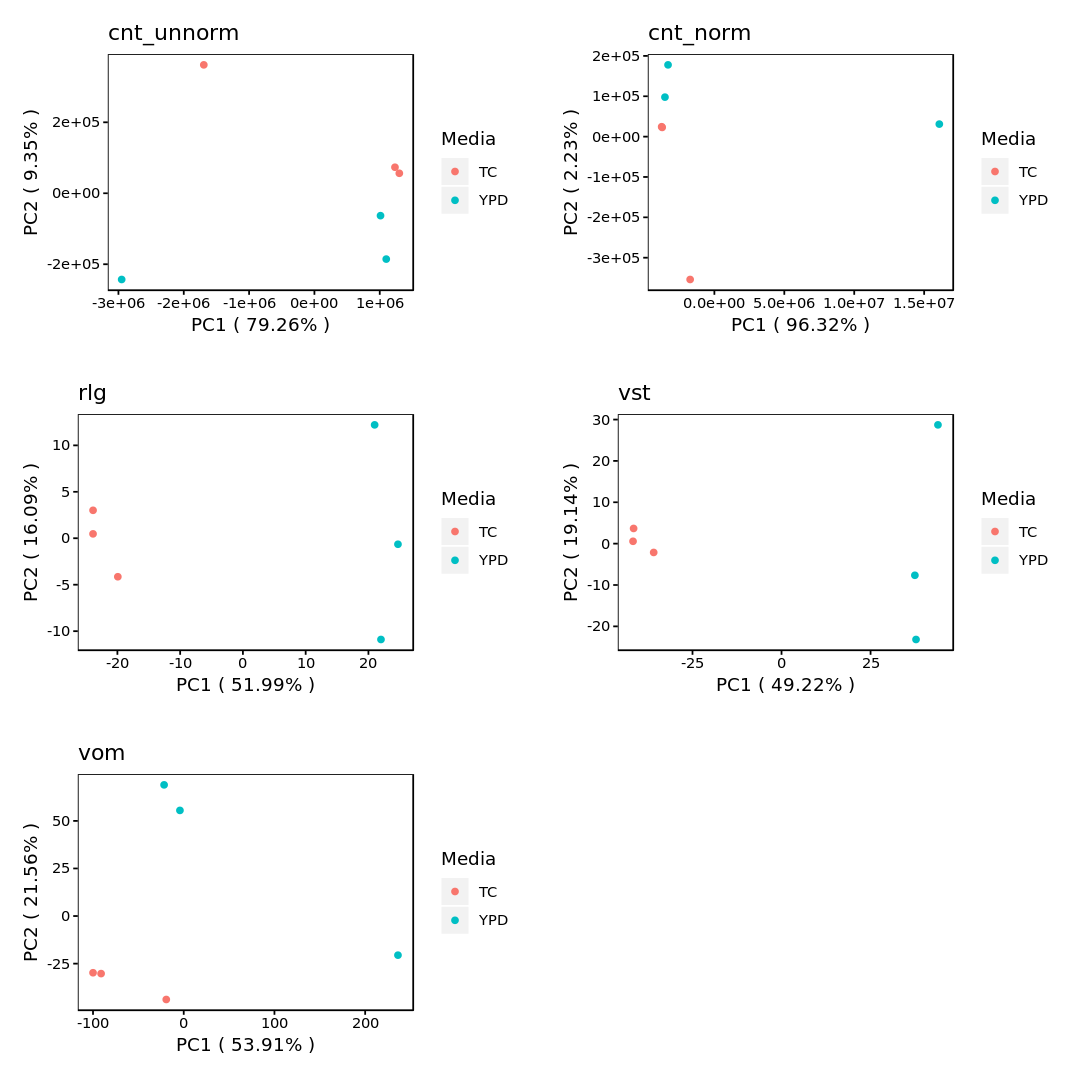

In [80]:
options(repr.plot.width = 9, repr.plot.height = 9)
grid.arrange(
    gps[[1]], gps[[2]], 
    gps[[3]], gps[[4]],
    gps[[5]],
    ncol = 2)

# Store the results

In [81]:
outfile <- file.path(OUTDIR, "HTS-GroupB-DESeq.RData")

save(dds, res_media, 
     rlgexp, vstexp, vomexp,
     gene_exp, 
     file = outfile)

tools::md5sum(outfile)

/shared_space/TA_clint/analysis_output/out/HTS-GroupB-DESeq.RData 
                               "b21933f18011b46d4882c76f8638b6f4"

# The end